<a href="https://colab.research.google.com/github/Beebruna/Treinamento_Data_Science/blob/main/cifar_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dropout, BatchNormalization

In [15]:
cifar = keras.datasets.cifar100

In [16]:
(train_images, train_labels), (test_images, test_labels) = cifar.load_data()

In [17]:
print(train_images.shape)
print(test_images.shape)
print(np.unique(train_labels))

(50000, 32, 32, 3)
(10000, 32, 32, 3)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


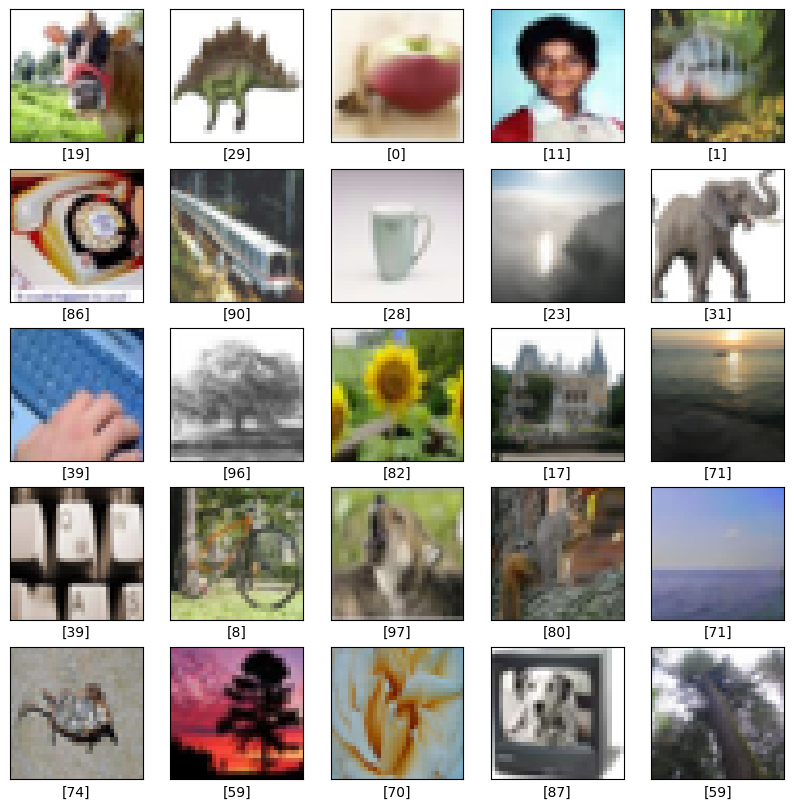

In [5]:
fig = plt.figure(figsize=(10, 10))

for i in range(25):
    ax = fig.add_subplot(5, 5, i+1)
    ax.imshow(train_images[i], cmap='binary')
    ax.set_xlabel(train_labels[i])
    ax.set_xticks([])
    ax.set_yticks([])

fig.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

In [6]:
train_images = train_images / 255
test_images = test_images / 255

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(100, activation=tf.nn.softmax)
])

In [9]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 256)               786688    
                                                                 
 dense_1 (Dense)             (None, 100)               25700     
                                                                 
Total params: 812,388
Trainable params: 812,388
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_images, train_labels, epochs=15)

Epoch 1/15
1563/1563 [==============================] - 9s 3ms/step - loss: 4.2215 - accuracy: 0.0607
Epoch 2/15
1563/1563 [==============================] - 5s 3ms/step - loss: 3.9001 - accuracy: 0.1063
Epoch 3/15
1563/1563 [==============================] - 6s 4ms/step - loss: 3.8316 - accuracy: 0.1177
Epoch 4/15
1563/1563 [==============================] - 4s 3ms/step - loss: 3.7977 - accuracy: 0.1238
Epoch 5/15
1563/1563 [==============================] - 5s 3ms/step - loss: 3.7756 - accuracy: 0.1287
Epoch 6/15
1563/1563 [==============================] - 5s 3ms/step - loss: 3.7647 - accuracy: 0.1315
Epoch 7/15
1563/1563 [==============================] - 4s 3ms/step - loss: 3.7669 - accuracy: 0.1345
Epoch 8/15
1563/1563 [==============================] - 5s 3ms/step - loss: 3.7773 - accuracy: 0.1312
Epoch 9/15
1563/1563 [==============================] - 4s 3ms/step - loss: 3.7866 - accuracy: 0.1324
Epoch 10/15
1563/1563 [==============================] - 4s 3ms/step - loss: 3.799

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 3.9733 - accuracy: 0.1194


In [ ]:
print(test_loss)
print(test_accuracy)

3.9732508659362793
0.11940000206232071


In [ ]:
history.history

{'loss': [4.221505641937256,
  3.900132894515991,
  3.831613540649414,
  3.7977235317230225,
  3.7755534648895264,
  3.764657497406006,
  3.7668793201446533,
  3.777311325073242,
  3.7865593433380127,
  3.7989625930786133,
  3.8061318397521973,
  3.815889596939087,
  3.815565824508667,
  3.829580068588257,
  3.8407340049743652],
 'accuracy': [0.060679998248815536,
  0.10632000118494034,
  0.11772000044584274,
  0.12383999675512314,
  0.1286800056695938,
  0.13145999610424042,
  0.13446000218391418,
  0.13123999536037445,
  0.13242000341415405,
  0.12950000166893005,
  0.13113999366760254,
  0.12897999584674835,
  0.13262000679969788,
  0.1295199990272522,
  0.12790000438690186]}

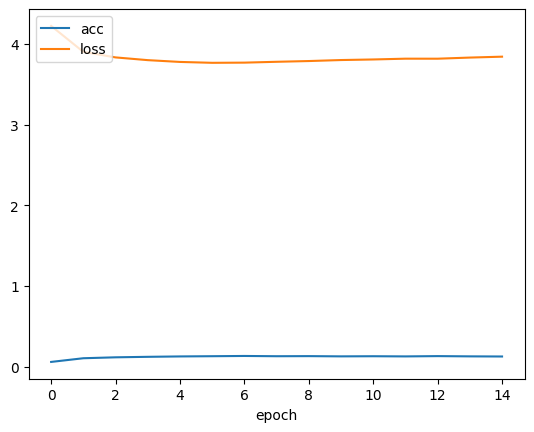

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.legend(['acc', 'loss'], loc='upper left')
plt.show()

# Modelo 2 - CNN

In [18]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=5, padding='same', activation='relu', input_shape=(32,32,3)))
model.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model.add(keras.layers.Conv2D(filters=64, kernel_size=5, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model.add(keras.layers.Conv2D(filters=128, kernel_size=5, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dense(100, activation='softmax'))

In [19]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 128)         204928    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 128)       

In [21]:
history = model.fit(train_images, train_labels, epochs=25)

Epoch 1/25
1563/1563 [==============================] - 9s 5ms/step - loss: 4.0242 - accuracy: 0.1178
Epoch 2/25
1563/1563 [==============================] - 7s 5ms/step - loss: 3.4068 - accuracy: 0.1991
Epoch 3/25
1563/1563 [==============================] - 7s 4ms/step - loss: 3.2913 - accuracy: 0.2219
Epoch 4/25
1563/1563 [==============================] - 7s 4ms/step - loss: 3.2567 - accuracy: 0.2306
Epoch 5/25
1563/1563 [==============================] - 7s 5ms/step - loss: 3.2548 - accuracy: 0.2284
Epoch 6/25
1563/1563 [==============================] - 7s 4ms/step - loss: 3.2714 - accuracy: 0.2253
Epoch 7/25
1563/1563 [==============================] - 7s 5ms/step - loss: 3.2763 - accuracy: 0.2293
Epoch 8/25
1563/1563 [==============================] - 7s 5ms/step - loss: 3.2919 - accuracy: 0.2241
Epoch 9/25
1563/1563 [==============================] - 7s 5ms/step - loss: 3.2858 - accuracy: 0.2264
Epoch 10/25
1563/1563 [==============================] - 8s 5ms/step - loss: 3.288

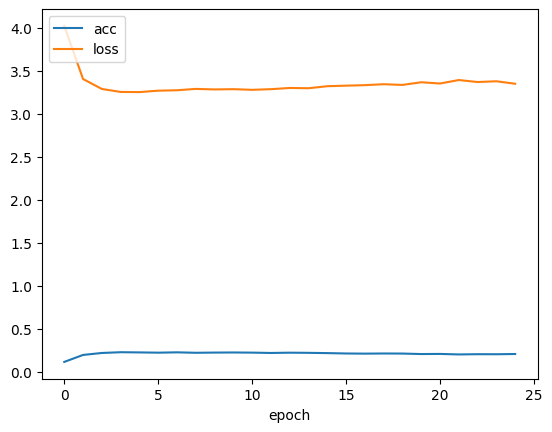

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.legend(['acc', 'loss'], loc='upper left')
plt.show()

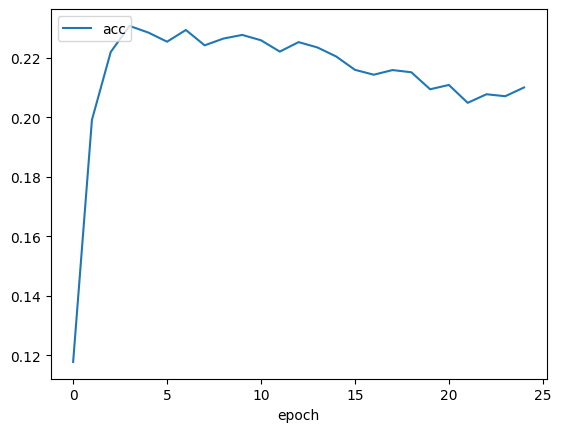

In [23]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['acc', 'loss'], loc='upper left')
plt.show()

In [24]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 3.4506 - accuracy: 0.2028


In [25]:
print(test_loss)
print(test_accuracy)

3.450622320175171
0.20280000567436218


# Teste 3

In [27]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=5, padding='same', activation='relu', input_shape=(32,32,3)))
model.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
model.add(Dropout(0.2))

model.add(keras.layers.Conv2D(filters=64, kernel_size=5, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
model.add(Dropout(0.2))

model.add(keras.layers.Conv2D(filters=128, kernel_size=5, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
model.add(Dropout(0.2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(keras.layers.Dense(100, activation='softmax'))

In [28]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)         

In [30]:
history = model.fit(train_images, train_labels, epochs=25)

Epoch 1/25
1563/1563 [==============================] - 9s 5ms/step - loss: 4.4967 - accuracy: 0.0610
Epoch 2/25
1563/1563 [==============================] - 7s 5ms/step - loss: 3.8928 - accuracy: 0.1131
Epoch 3/25
1563/1563 [==============================] - 7s 5ms/step - loss: 3.8254 - accuracy: 0.1255
Epoch 4/25
1563/1563 [==============================] - 8s 5ms/step - loss: 3.8389 - accuracy: 0.1238
Epoch 5/25
1563/1563 [==============================] - 8s 5ms/step - loss: 3.8574 - accuracy: 0.1231
Epoch 6/25
1563/1563 [==============================] - 8s 5ms/step - loss: 3.8975 - accuracy: 0.1165
Epoch 7/25
1563/1563 [==============================] - 8s 5ms/step - loss: 3.9170 - accuracy: 0.1129
Epoch 8/25
1563/1563 [==============================] - 7s 5ms/step - loss: 3.9363 - accuracy: 0.1113
Epoch 9/25
1563/1563 [==============================] - 8s 5ms/step - loss: 3.9518 - accuracy: 0.1089
Epoch 10/25
1563/1563 [==============================] - 7s 5ms/step - loss: 3.964

In [31]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 4.0537 - accuracy: 0.0994


In [32]:
print(test_loss)
print(test_accuracy)

4.053694725036621
0.09939999878406525


In [33]:
history = model.fit(train_images, train_labels, epochs=25)

Epoch 1/25
1563/1563 [==============================] - 8s 5ms/step - loss: 4.0172 - accuracy: 0.0930
Epoch 2/25
1563/1563 [==============================] - 8s 5ms/step - loss: 4.0311 - accuracy: 0.0908
Epoch 3/25
1563/1563 [==============================] - 8s 5ms/step - loss: 4.0222 - accuracy: 0.0907
Epoch 4/25
1563/1563 [==============================] - 9s 6ms/step - loss: 4.0247 - accuracy: 0.0899
Epoch 5/25
1563/1563 [==============================] - 9s 6ms/step - loss: 4.0192 - accuracy: 0.0919
Epoch 6/25
1563/1563 [==============================] - 7s 5ms/step - loss: 4.0062 - accuracy: 0.0928
Epoch 7/25
1563/1563 [==============================] - 8s 5ms/step - loss: 4.0340 - accuracy: 0.0879
Epoch 8/25
1563/1563 [==============================] - 11s 7ms/step - loss: 4.0394 - accuracy: 0.0855
Epoch 9/25
1563/1563 [==============================] - 8s 5ms/step - loss: 4.0250 - accuracy: 0.0885
Epoch 10/25
1563/1563 [==============================] - 8s 5ms/step - loss: 4.01

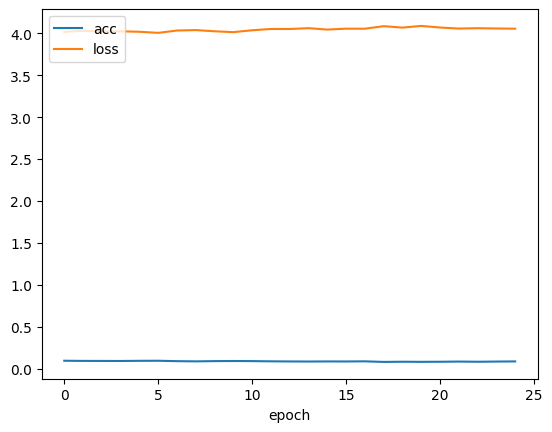

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.legend(['acc', 'loss'], loc='upper left')
plt.show()

# Teste 4

In [35]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=5, padding='same', activation='relu', input_shape=(32,32,3)))
model.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model.add(keras.layers.Conv2D(filters=64, kernel_size=5, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model.add(keras.layers.Conv2D(filters=128, kernel_size=5, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(Dropout(0.33))

model.add(keras.layers.Dense(100, activation='softmax'))

In [36]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 128)         204928    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 4, 4, 128)       

In [41]:
history = model.fit(train_images, train_labels, epochs=25)

Epoch 1/25
1563/1563 [==============================] - 9s 5ms/step - loss: 4.2406 - accuracy: 0.1006
Epoch 2/25
1563/1563 [==============================] - 9s 5ms/step - loss: 3.6001 - accuracy: 0.1647
Epoch 3/25
1563/1563 [==============================] - 7s 5ms/step - loss: 3.5381 - accuracy: 0.1746
Epoch 4/25
1563/1563 [==============================] - 8s 5ms/step - loss: 3.5300 - accuracy: 0.1809
Epoch 5/25
1563/1563 [==============================] - 7s 4ms/step - loss: 3.5436 - accuracy: 0.1793
Epoch 6/25
1563/1563 [==============================] - 8s 5ms/step - loss: 3.6171 - accuracy: 0.1680
Epoch 7/25
1563/1563 [==============================] - 7s 5ms/step - loss: 3.6345 - accuracy: 0.1658
Epoch 8/25
1563/1563 [==============================] - 8s 5ms/step - loss: 3.7074 - accuracy: 0.1535
Epoch 9/25
1563/1563 [==============================] - 9s 6ms/step - loss: 3.7314 - accuracy: 0.1505
Epoch 10/25
1563/1563 [==============================] - 7s 5ms/step - loss: 3.756

In [44]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 3.6712 - accuracy: 0.1652


In [45]:
print(test_loss)
print(test_accuracy)

3.671163320541382
0.16519999504089355


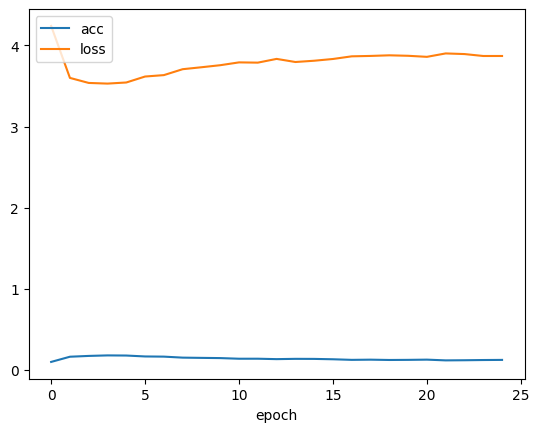

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.legend(['acc', 'loss'], loc='upper left')
plt.show()

# Teste 5

In [47]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=5, padding='same', activation='relu', input_shape=(32,32,3)))
model.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
model.add(BatchNormalization())

model.add(keras.layers.Conv2D(filters=64, kernel_size=5, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
model.add(BatchNormalization())

model.add(keras.layers.Conv2D(filters=128, kernel_size=5, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))
model.add(BatchNormalization())

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(Dropout(0.33))

model.add(keras.layers.Dense(100, activation='softmax'))

In [48]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                      

In [51]:
history = model.fit(train_images, train_labels, epochs=25)

Epoch 1/25
1563/1563 [==============================] - 9s 5ms/step - loss: 3.7650 - accuracy: 0.1402
Epoch 2/25
1563/1563 [==============================] - 8s 5ms/step - loss: 3.0497 - accuracy: 0.2590
Epoch 3/25
1563/1563 [==============================] - 8s 5ms/step - loss: 2.6306 - accuracy: 0.3403
Epoch 4/25
1563/1563 [==============================] - 7s 5ms/step - loss: 2.2897 - accuracy: 0.4094
Epoch 5/25
1563/1563 [==============================] - 9s 6ms/step - loss: 1.9975 - accuracy: 0.4717
Epoch 6/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7443 - accuracy: 0.5322
Epoch 7/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4904 - accuracy: 0.5930
Epoch 8/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2671 - accuracy: 0.6500
Epoch 9/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0681 - accuracy: 0.6977
Epoch 10/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.886

In [52]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 5ms/step - loss: 4.2111 - accuracy: 0.4489


In [53]:
print(test_loss)
print(test_accuracy)

4.211143493652344
0.4489000141620636


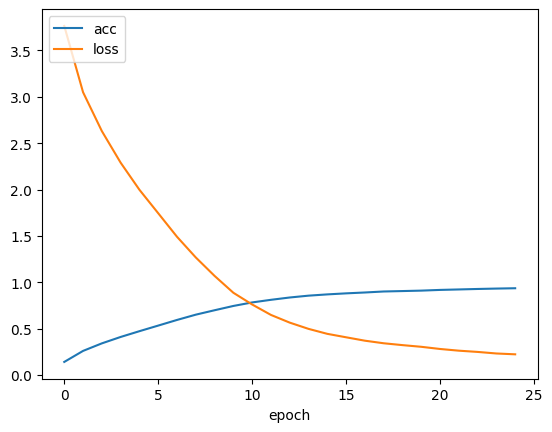

In [54]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.legend(['acc', 'loss'], loc='upper left')
plt.show()